In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import cv2 
from tqdm import tqdm

## Append All Labels

In [350]:
directory = "C:/Users/h00ns/Tracking/2_rallies_label\\"+ r"2rallies_"
first_file = open('C:/Users/h00ns/Tracking/2_rallies_all_labels_real.txt','a')


for i in range(1884):
    try:
        num = i+1
        end = str(num)+'.txt'
        file = directory+end

        #in_file = open(file)
        next_file = open(file, 'r').read()
        first_file.write(next_file)
        first_file.write(' \n')
    except FileNotFoundError:
        print("not found")

## Draw Court

In [185]:
import matplotlib.pyplot as plt

def draw_court(ax):
    court = plt.Rectangle([0,0], width = 640, height = 975, fill = False)
    #front_court = Rectangle([43.1, 0], width = 64, height = 54.4, fill = False)
    back_court = plt.Rectangle([0,0], width = 640, height = 431, fill = False)
    left_service = plt.Rectangle([0,271], width = 160, height = 160, fill = False)
    right_service = plt.Rectangle([480,271], width = 160, height = 160, fill = False)
    back_left = plt.Rectangle([0,0], width = 320, height = 431, fill = False)
    
    element = [court, back_court, left_service, right_service, back_left]
    
    for i in element:
        ax.add_patch(i)

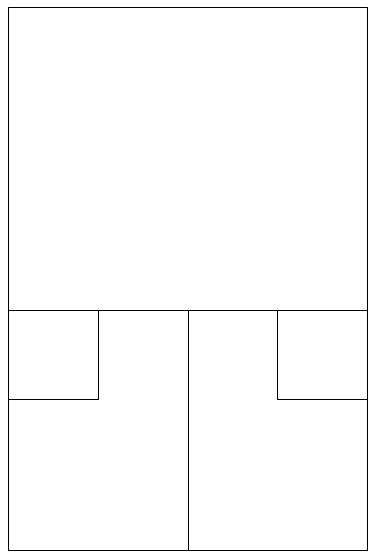

In [163]:
fig = plt.figure()
fig.set_size_inches(6.5,10)
ax=fig.add_subplot(1,1,1)
draw_court(ax)

plt.ylim(-2,975)
plt.xlim(-2,645)
plt.axis('off')
plt.show()
fig.savefig('court_floor.jpg')

## Get Pixel Coordinates

In [3]:
# importing the module
import cv2
   
# function to display the coordinates of
# of the points clicked on the image 
def click_event(event, x, y, flags, params):
  
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
  
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
  
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font,
                    1, (255, 0, 0), 2)
        cv2.imshow('image', img)
  
    # checking for right mouse clicks     
    if event==cv2.EVENT_RBUTTONDOWN:
  
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
  
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        b = img[y, x, 0]
        g = img[y, x, 1]
        r = img[y, x, 2]
        cv2.putText(img, str(b) + ',' +
                    str(g) + ',' + str(r),
                    (x,y), font, 1,
                    (255, 255, 0), 2)
        cv2.imshow('image', img)
  


In [19]:
# driver function
if __name__=="__main__":
  
    # reading the image
    img = cv2.imread('court_floor_final.jpg', 1)
  
    # displaying the image
    cv2.namedWindow('image',cv2.WINDOW_NORMAL)
    cv2.imshow('image', img)
  
    # setting mouse hadler for the image
    # and calling the click_event() function
    cv2.setMouseCallback('image', click_event)
  
    # wait for a key to be pressed to exit
    cv2.waitKey(0)
  
    # close the window
    cv2.destroyAllWindows()

#print [width, height]

2   304
2   2
359   2
360   304


## Transform Coordinates

In [11]:
import numpy as np
import cv2 
from tqdm import tqdm
import pandas as pd

In [4]:
class PixelMapper(object): 
    """ Create an object for converting pixels to geographic coordinates, using four points with known locations which form a quadrilteral in both planes Parameters ---------- pixel_array : (4,2) shape numpy array The (x,y) pixel coordinates corresponding to the top left, top right, bottom right, bottom left pixels of the known region lonlat_array : (4,2) shape numpy array The (lon, lat) coordinates corresponding to the top left, top right, bottom right, bottom left pixels of the known region """ 
    
    def __init__(self, pixel_array, lonlat_array): 
        assert pixel_array.shape==(4,2), "Need (4,2) input array" 
        assert lonlat_array.shape==(4,2), "Need (4,2) input array" 
        
        self.M = cv2.getPerspectiveTransform(np.float32(pixel_array),np.float32(lonlat_array)) 
        self.invM = cv2.getPerspectiveTransform(np.float32(lonlat_array),np.float32(pixel_array)) 
        
    def pixel_to_lonlat(self, pixel): 
        """ Convert a set of pixel coordinates to lon-lat coordinates 
        
        Parameters 
        ---------- 
        pixel : (N,2) numpy array or (x,y) tuple The (x,y) pixel coordinates to be converted 
        
        Returns 
        ------- 
        (N,2) numpy array The corresponding (lon, lat) coordinates """ 
        
        if type(pixel) != np.ndarray: 
            pixel = np.array(pixel).reshape(1,2) 
        
        assert pixel.shape[1]==2, "Need (N,2) input array" 
        pixel = np.concatenate([pixel, np.ones((pixel.shape[0],1))], axis=1) 
        lonlat = np.dot(self.M,pixel.T) 
        
        return (lonlat[:2,:]/lonlat[2,:]).T 
        
    def lonlat_to_pixel(self, lonlat): 
        """ Convert a set of lon-lat coordinates to pixel coordinates 
        
        Parameters 
        ---------- 
        lonlat : (N,2) numpy array or (x,y) tuple The (lon,lat) coordinates to be converted 
        
        Returns 
        ------- 
        (N,2) numpy array The corresponding (x, y) pixel coordinates """ 
        
        if type(lonlat) != np.ndarray: 
            lonlat = np.array(lonlat).reshape(1,2) 
        
        assert lonlat.shape[1]==2, "Need (N,2) input array" 
        lonlat = np.concatenate([lonlat, np.ones((lonlat.shape[0],1))], axis=1) 
        pixel = np.dot(self.invM,lonlat.T) 
        
        return (pixel[:2,:]/pixel[2,:]).T

In [225]:
#final
#[height, width]
quad_coords_1 = { 
                "pixel": np.array([[0, 0],[600,0], [600,800], [0,800]]), #text file
                "lonlat": np.array([[0, 0],[576,0], [576,1024], [0,1024]]) #match video
              }

quad_coords_2 = { 
                "pixel": np.array([[0, 0],[510,1303], [1220,1798], [1220,131]]), #match_video floor
                "lonlat": np.array([[2 ,  2],[358,2],[360,542], [2, 543]]) #floor pic 
              }


In [5]:
# final new court: Use this one!
#[height, width]
quad_coords = { 
                "pixel": np.array([[273, 317],[273,696], [650,958], [650,70]]), #match video
                "lonlat": np.array([[2 ,  2],[358,2],[360,542], [2, 543]]) #floor pic
              }

dd =  PixelMapper(quad_coords["pixel"], quad_coords['lonlat'])
#[,top left, top right, bottom right, bottom left]

#317   273
#696   272
#958   575
#71   574
#511   407

In [6]:
dd =  PixelMapper(quad_coords["pixel"], quad_coords['lonlat'])

In [30]:
point = dd.pixel_to_lonlat([535,687]) #[height, width]
print(point)
int_point = [int(point[0][1]), int(point[0][0])]
int_point

[[266.53525103 456.61556212]]


[456, 266]

In [31]:
black = [255,50,255]

img = cv2.imread('court_floor_final.jpg', 1)

for x in range(-5,5):
    img[int_point[0]+x, int_point[1]] = black
    img[int_point[0], int_point[1]+x] = black
    
print(img[int_point[0], int_point[1]])
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image', img)
cv2.waitKey(0)

[255  50 255]


-1

In [86]:
black = [255,50,255]

img = cv2.imread('court_dim.PNG', 1)
img.shape

(8228, 5405, 3)

## Transform Labels to Court

In [50]:
#labels to video

quad_coords = { 
                "pixel": np.array([[0 ,  0], [0 , 1920], [1080 , 0],[1080  , 1920]]), #match video [height, width]
                "lonlat": np.array([[0,0],[0 , 1],[1,0],[1,1]]) #text file
              }


In [226]:
ddd =  PixelMapper(quad_coords_1["pixel"], quad_coords_1['lonlat'])
dddd =  PixelMapper(quad_coords_2["pixel"], quad_coords_2['lonlat'])

In [12]:
import pandas as pd #1,24,39
file = r"C:\Users\h00ns\Tracking\yh_sy_files\yh_sy_sample_gimcheon.txt"


In [23]:
#Non-sorted Player Tracking

data = pd.read_csv(file, sep=' ', names = ['item', 'x_center', 'y_center', 'width', 'height'])
data['x_coordinate'] = data['x_center']
data['y_coordinate'] = data['y_center']+(data['height']/2)
data.head()

#people_data = data[data['item'] == 0]
#people_data.head()

,item,x_center,y_center,width,height,8,7,6,5,55,555,x_coordinate,y_coordinate
0,2,1,623,268,73,169,-1,-1,-1,-1,NaN,1,659.5
1,2,2,310,306,108,244,-1,-1,-1,-1,NaN,2,364.0
2,2,3,633,271,25,30,-1,-1,-1,-1,NaN,3,645.5
3,2,4,342,315,27,34,-1,-1,-1,-1,NaN,4,355.5
4,3,1,626,267,73,170,-1,-1,-1,-1,NaN,1,662.5


In [13]:
people_data=pd.read_csv("organized_labels_yh_sy.csv")
people_data

,frame,item,x_center,y_center,width,height,x_coordinate,y_coordinate
0,2,1,623,268,73,169,623,352.5
1,2,2,310,306,108,244,310,428.0
2,2,3,633,271,25,30,633,286.0
3,2,4,342,315,27,34,342,332.0
4,3,1,626,267,73,170,626,352.0
...,...,...,...,...,...,...,...,...
29983,7890,1327,335,271,23,27,335,284.5
29984,7891,1242,450,258,84,189,450,352.5
29985,7891,1317,320,267,74,153,320,343.5
29986,7891,1318,477,263,23,25,477,275.5


In [227]:
people = []

for idx in tqdm(range(len(people_data))):
    x = people_data['x_coordinate'].iloc[idx]
    y = people_data['y_coordinate'].iloc[idx]
   
   
    point = ddd.lonlat_to_pixel([y,x])
    int_point = [int(point[0][0]), int(point[0][1])] #[height, width]
    people.append(int_point)

    #x_check = int(x*1920)
    #y_check = int(y*1080)

people[:5]
final = people

100%|██████████| 238/238 [00:00<00:00, 19887.72it/s]


In [15]:
final = []

for coordi in people: #coordi = [height, width]
    height = coordi[0]
    width = coordi[1]
    
    if (249<width<1623 and 552<height<995):
        final.append(coordi)
        
len(final)


0

In [524]:
player_1 = final[::2]
player_2 = final[1::2]



In [228]:
from tqdm import tqdm

black = [255,0,255]
img = cv2.imread('court_floor_final.jpg', 1)

transformed = []


for point in final: #point = [height, width]
    height = point[0]
    width = point[1]
    dot = dddd.pixel_to_lonlat([height, width])
    int_point = [int(dot[0][0]), int(dot[0][1])] 
    transformed.append(int_point)

print((len(transformed)), "[height, width]")

#original

for int_point in tqdm(transformed):
    try:
        for x in range(-5,5):
            img[int_point[0]+x, int_point[1]] = black
            img[int_point[0], int_point[1]+x] = black

    except IndexError:
        
        print("error", int_point)
        pass
#print(img[int_point[0], int_point[1]])
cv2.namedWindow('image2',cv2.WINDOW_NORMAL)
cv2.imshow('image2', img)
cv2.waitKey(0)

238 [height, width]


100%|██████████| 238/238 [00:00<00:00, 57370.37it/s]


-1

## Sorted Tracking

In [207]:
#Sorted Player Tracking
import pandas as pd #1,24,39
file = '2rallies.txt'

data = pd.read_csv(file, sep=' ', names = ['frame', 'item #', 'x_center', 'y_center', 'width', 'height', '1', '2', '3', '4','5'])
data['x_coordinate'] = data['x_center'] + (data['width']/2)
data['y_coordinate'] = data['y_center'] + data['height']
#data.to_excel('2_rallies.xlsx', index = False)
data


,frame,item #,x_center,y_center,width,height,1,2,3,4,5,x_coordinate,y_coordinate
0,2,1,1665,577,181,261,-1,-1,-1,-1,NaN,1755.5,838
1,2,2,24,547,160,353,-1,-1,-1,-1,NaN,104.0,900
2,2,3,664,529,107,289,-1,-1,-1,-1,NaN,717.5,818
3,2,4,1848,512,71,305,-1,-1,-1,-1,NaN,1883.5,817
4,2,5,105,453,93,241,-1,-1,-1,-1,NaN,151.5,694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17072,1883,214,594,435,26,28,-1,-1,-1,-1,NaN,607.0,463
17073,1883,224,734,488,32,39,-1,-1,-1,-1,NaN,750.0,527
17074,1883,225,1675,536,149,229,-1,-1,-1,-1,NaN,1749.5,765
17075,1883,238,711,482,92,249,-1,-1,-1,-1,NaN,757.0,731


In [ ]:
class PixelMapper(object): 
    """ Create an object for converting pixels to geographic coordinates, using four points with known locations which form a quadrilteral in both planes Parameters ---------- pixel_array : (4,2) shape numpy array The (x,y) pixel coordinates corresponding to the top left, top right, bottom right, bottom left pixels of the known region lonlat_array : (4,2) shape numpy array The (lon, lat) coordinates corresponding to the top left, top right, bottom right, bottom left pixels of the known region """ 
    
    def __init__(self, pixel_array, lonlat_array): 
        assert pixel_array.shape==(4,2), "Need (4,2) input array" 
        assert lonlat_array.shape==(4,2), "Need (4,2) input array" 
        
        self.M = cv2.getPerspectiveTransform(np.float32(pixel_array),np.float32(lonlat_array)) 
        self.invM = cv2.getPerspectiveTransform(np.float32(lonlat_array),np.float32(pixel_array)) 
        
    def pixel_to_lonlat(self, pixel): 
        """ Convert a set of pixel coordinates to lon-lat coordinates 
        
        Parameters 
        ---------- 
        pixel : (N,2) numpy array or (x,y) tuple The (x,y) pixel coordinates to be converted 
        
        Returns 
        ------- 
        (N,2) numpy array The corresponding (lon, lat) coordinates """ 
        
        if type(pixel) != np.ndarray: 
            pixel = np.array(pixel).reshape(1,2) 
        
        assert pixel.shape[1]==2, "Need (N,2) input array" 
        pixel = np.concatenate([pixel, np.ones((pixel.shape[0],1))], axis=1) 
        lonlat = np.dot(self.M,pixel.T) 
        
        return (lonlat[:2,:]/lonlat[2,:]).T 
        
    def lonlat_to_pixel(self, lonlat): 
        """ Convert a set of lon-lat coordinates to pixel coordinates 
        
        Parameters 
        ---------- 
        lonlat : (N,2) numpy array or (x,y) tuple The (lon,lat) coordinates to be converted 
        
        Returns 
        ------- 
        (N,2) numpy array The corresponding (x, y) pixel coordinates """ 
        
        if type(lonlat) != np.ndarray: 
            lonlat = np.array(lonlat).reshape(1,2) 
        
        assert lonlat.shape[1]==2, "Need (N,2) input array" 
        lonlat = np.concatenate([lonlat, np.ones((lonlat.shape[0],1))], axis=1) 
        pixel = np.dot(self.invM,lonlat.T) 
        
        return (pixel[:2,:]/pixel[2,:]).T

In [ ]:
# final new court: Use this one!
#[height, width]
quad_coords = { 
                "pixel": np.array([[273, 317],[273,696], [650,958], [650,70]]), #match video
                "lonlat": np.array([[2 ,  2],[358,2],[360,542], [2, 543]]) #floor pic
              }

dd =  PixelMapper(quad_coords["pixel"], quad_coords['lonlat'])
#[,top left, top right, bottom right, bottom left]

#317   273
#696   272
#958   575
#71   574
#511   407

In [41]:
correct_data= data[data['frame'] <= 772]
wrong_data = data[data['frame'] > 772]

for idx in range(len(wrong_data)):
    if wrong_data['item #'].iloc[idx] == 6:
        wrong_data['item #'].iloc[idx] = 72
            
    elif wrong_data['item #'].iloc[idx] == 72:
        wrong_data['item #'].iloc[idx] = 6
        
edited_data = correct_data.append(wrong_data)

#edited_data.to_csv("gimcheon_sample_game.csv", index = False)

C:\Users\h00ns\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\h00ns\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [129]:
people_data = pd.read_csv("organized_labels_yh_sy.csv")
#people_data = people_data[people_data['item'] == 701]
#people_data = people_data[people_data['frame'] < 5431]

#people_data = people_data[people_data['item'] == 907]
#people_data = people_data[people_data['frame'] < 5647]

people_data = people_data[people_data['item'] == 1190]
people_data = people_data[people_data['frame'] > 7348]

people_data

,frame,item,box_left,box_top,width,height,x_coordinate,y_coordinate
27947,7349,1190,622,304,147,240,695.5,544
27951,7350,1190,623,304,147,240,696.5,544
27955,7351,1190,625,304,147,241,698.5,545
27959,7352,1190,627,304,147,242,700.5,546
27963,7353,1190,629,303,148,244,703.0,547
...,...,...,...,...,...,...,...,...
29769,7832,1190,626,417,27,39,639.5,456
29773,7833,1190,631,420,26,38,644.0,458
29830,7848,1190,538,316,23,31,549.5,347
29834,7849,1190,537,315,24,32,549.0,347


In [130]:
people = []
for idx in tqdm(range(len(people_data))):
    x = people_data['x_coordinate'].iloc[idx]
    y = people_data['y_coordinate'].iloc[idx]
    
    people.append([y,x])
    
    
final = people

100%|██████████| 355/355 [00:00<00:00, 44368.96it/s]


In [114]:
final = []

for coordi in people: #coordi = [height, width]
    height = coordi[1]
    width = coordi[0]
    
    if (391<width<1520 and 513<height<1306):
        final.append(coordi)
        
len(final)

#[760, 391], [513,595],[513,1306], [760,1520]]



8

In [190]:
from tqdm import tqdm

black = [255,0,255]
img = cv2.imread('court_floor_final.jpg', 1)

transformed = []


for point in final: #point = [height, width]
    height = point[0]
    width = point[1]
    dot = dd.pixel_to_lonlat([height, width])
    int_point = [int(dot[0][1]), int(dot[0][0])] 
    transformed.append(int_point)

print((len(transformed)), "[height, width]")

#original

for int_point in tqdm(transformed):
    try:
        for x in range(-5,5):
            img[int_point[0]+x, int_point[1]] = black
            img[int_point[0], int_point[1]+x] = black

    except IndexError:
        
        print("error", int_point)
        pass
#print(img[int_point[0], int_point[1]])
cv2.namedWindow('image2',cv2.WINDOW_NORMAL)
cv2.imshow('image2', img)
cv2.waitKey(0)

355 [height, width]


100%|██████████| 355/355 [00:00<00:00, 39543.69it/s]


-1

In [287]:
for int_point in tqdm(transformed):
    try:
        img[int_point[0], int_point[1]] = black

    except IndexError:
        
        print("error", int_point)
        pass
#print(img[int_point[0], int_point[1]])

cv2.imwrite('player1.jpg', img)


cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image', img)
cv2.waitKey(0)

100%|██████████| 951/951 [00:00<00:00, 476956.01it/s]


-1

## Heatmap Final

In [192]:
import seaborn as sns

quad_coords_2 = { 
                "pixel": np.array([[2 ,  2],[358,2],[360,542], [2, 543]]), #court_floor_final.jpg
                "lonlat": np.array([[0, 0],[640,0], [640,975], [0,975]]) #court_floor.jpg(draw_court)
              }

ddd =  PixelMapper(quad_coords_2["pixel"], quad_coords_2['lonlat'])

x=[]
y=[]

for pair in transformed:
    height = pair[0]
    width = pair[1]
    dot = ddd.pixel_to_lonlat([height, width])
    int_point = [int(dot[0][1]), int(dot[0][0])] 
    
    x.append(int(dot[0][1]))
    y.append(int(dot[0][0]))
    
    
DF = pd.DataFrame()
DF['X'] = x
DF['Y'] = y

C:\Users\h00ns\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


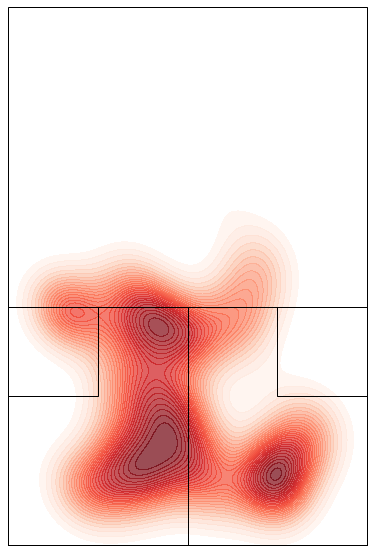

In [193]:
#Final Heatmap!!

a4_dims = (6.5, 10)
fig, ax1 = plt.subplots(figsize=a4_dims)

plot = sns.kdeplot(DF.X,975- DF.Y, cmap="Reds", shade=True,n_levels=30, alpha = 0.7, ax = ax1)
draw_court(plot)

#plt.ylim(-0,975)
#plt.xlim(-0,645)

plt.ylim(-10,975)
plt.xlim(-2,645)

plt.axis('off')
plt.savefig('myfig_2')
plt.show(ax1)







## Average Speed

In [194]:
import numpy as np
people_data

distance_df = pd.DataFrame()
distance_df['current_frame'] = people_data['frame']
distance_df['next_frame'] = people_data['frame']+1

distance_df['x1'] = people_data['x_coordinate']
distance_df['y1'] = people_data['y_coordinate']


distance_df = distance_df.reset_index(drop=True)


x2 = people_data['x_coordinate'].iloc[1:len(distance_df)-1]
y2 = people_data['y_coordinate'].iloc[1:len(distance_df)-1]

distance_df['x2'] =x2.reset_index(drop=True)
distance_df['y2'] = y2.reset_index(drop=True)

distance_df = distance_df.reset_index(drop=True)
#distance_df = distance_df[:len(distance_df)-1]

distance_df['linear_distance'] = np.sqrt((distance_df['x2']-distance_df['x1'])**2+
                                         (distance_df['y2']-distance_df['y1'])**2)

distance_df = distance_df[:len(distance_df)-3]
distance_df

,current_frame,next_frame,x1,y1,x2,y2,linear_distance
0,7349,7350,695.5,544,696.5,544.0,1.000000
1,7350,7351,696.5,544,698.5,545.0,2.236068
2,7351,7352,698.5,545,700.5,546.0,2.236068
3,7352,7353,700.5,546,703.0,547.0,2.692582
4,7353,7354,703.0,547,710.0,546.0,7.071068
...,...,...,...,...,...,...,...
347,7770,7771,452.5,438,448.0,430.0,9.178780
348,7771,7772,448.0,430,446.5,422.0,8.139410
349,7772,7773,446.5,422,639.5,456.0,195.971937
350,7832,7833,639.5,456,644.0,458.0,4.924429


In [133]:
speed_df = distance_df
speed_df['delta_time'] = 1/25
speed_df['instantaneous_linear_speed'] = speed_df['linear_distance']/speed_df['delta_time']
speed_df['linear_distance'].sum()/speed_df['delta_time'].sum()

205.06454317912596

<AxesSubplot:>

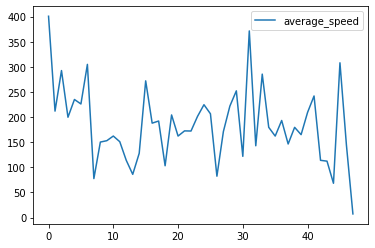

In [107]:
average_speed_df = pd.DataFrame()
average_speed=[]
for i in range(int(len(speed_df)/25+1)):
    combined_distance = speed_df['linear_distance'].iloc[i*25:(i+1)*25].sum()
    average_speed.append(combined_distance)
   #print(i, i+1, combined_distance)

average_speed_df['average_speed'] = average_speed
average_speed_df.plot.line()